In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    auc,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

# Get Data


In [3]:
# ! pip install yfinance

In [4]:
import yfinance as yf

xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers="XMR-USD", period="max", interval="1d")

# xmr = yf.Ticker("BTC-USD")
# df_xmr = yf.download(tickers="BTC-USD", period="max", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_xmr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308


In [6]:
df_xmr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2.170000e+03
mean,150.046511,155.404895,144.217264,150.030888,150.030888,2.427913e+08
std,81.476661,85.941782,76.394347,81.421979,81.421979,9.977934e+08
min,33.084614,36.645374,26.703888,33.010323,33.010323,1.016030e+07
25%,83.937435,87.292955,80.620262,83.923874,83.923874,6.354276e+07
50%,144.278290,147.416046,141.305954,144.346733,144.346733,1.010985e+08
75%,190.517448,199.267601,183.082325,190.412144,190.412144,1.889724e+08
max,483.709991,517.620239,453.390991,483.583618,483.583618,2.895912e+10


# Make Label


In [7]:
df_xmr["Close_difference"] = df_xmr["Close"].shift(-1) - df_xmr["Close"]
df = df_xmr.copy()

##### method1


In [8]:
df["Label"] = (df["Close_difference"] > 0).astype(int)
df.drop("Close_difference", axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0


##### method2


In [9]:
# def make_target(row):
#     diff = row["Close_difference"]
#     n = 1
#     if diff >= n:
#         return 1
#     if diff <= -n:
#         return -1
#     return 0


# df["Label"] = df.apply(make_target, axis=1)
# df.drop("Close_difference", axis=1, inplace=True)
# df

In [10]:
df = df.reset_index(drop=False)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...,...
2165,2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2167,2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0
2168,2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,1


# Change Features


In [11]:
df["Variance"] = df["High"] - df["Low"]
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Variance
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0,11.185997
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1,19.907997
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1,23.228004
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0,23.057007
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0,15.606003
...,...,...,...,...,...,...,...,...,...
2165,2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0,2.432022
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1,1.292755
2167,2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0,2.367538
2168,2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,1,2.961380


In [12]:
df.drop(columns=["Open", "High", "Low", "Adj Close"], inplace=True)
df

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2165,2023-10-14,152.833160,33344438,0,2.432022
2166,2023-10-15,152.448990,31895675,1,1.292755
2167,2023-10-16,152.544098,64382308,0,2.367538
2168,2023-10-17,150.522949,59794609,1,2.961380


# Fetching Data on a Specific Date


In [13]:
start_date_train_test = "2017-11-09"
end_date_train_test = "2023-10-07"

df_train_test = df[
    (df["Date"] >= start_date_train_test) & (df["Date"] <= end_date_train_test)
].reset_index(drop=True)
df_train_test

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2154,2023-10-03,147.151352,49389643,1,2.639694
2155,2023-10-04,150.469055,59400400,0,4.761566
2156,2023-10-05,149.623718,55704972,1,2.762878
2157,2023-10-06,151.992264,49535004,1,4.027649


# Split Data into Train and Test


In [14]:
def train_test_split_by_date(
    df: pd.DataFrame,
    start_date_train: str,
    end_date_train: str,
    start_date_test: str,
    end_date_test: str,
    divide_X_y: bool = True,
    test: bool = True,
):
    df_train = df[
        (df["Date"] >= start_date_train) & (df["Date"] <= end_date_train)
    ].reset_index(drop=True)

    df_test = df[
        (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
    ].reset_index(drop=True)

    if divide_X_y:
        X_train = df_train.drop(columns=["Label"])
        y_train = df_train["Label"]
        if test:
            X_test = df_test.drop(columns=["Label"])
            y_test = df_test["Label"]
            return X_train, X_test, y_train, y_test
        return X_train, y_train

    return df_train, df_test

In [15]:
start_date_train_val = "2017-11-09"
end_date_train_val = "2023-09-07"

start_date_test = "2023-09-08"
end_date_test = "2023-10-07"

df_train_val, df_test = train_test_split_by_date(
    df,
    start_date_train_val,
    end_date_train_val,
    start_date_test,
    end_date_test,
    divide_X_y=False,
)
df_test

,Date,Close,Volume,Label,Variance
0,2023-09-08,143.886154,46927009,0,3.195389
1,2023-09-09,143.406815,35896666,0,1.677582
2,2023-09-10,142.894440,33705148,0,1.965088
3,2023-09-11,139.930466,58031716,1,5.441772
4,2023-09-12,140.804672,57433672,1,3.567017
5,2023-09-13,143.115967,54374646,1,4.085739
6,2023-09-14,146.329483,44084896,1,4.750565
7,2023-09-15,147.350723,57280169,0,2.792572
8,2023-09-16,144.624649,34872985,1,3.754654
9,2023-09-17,145.797852,31255846,0,2.700851


# Plots


### Stock Chart Plot


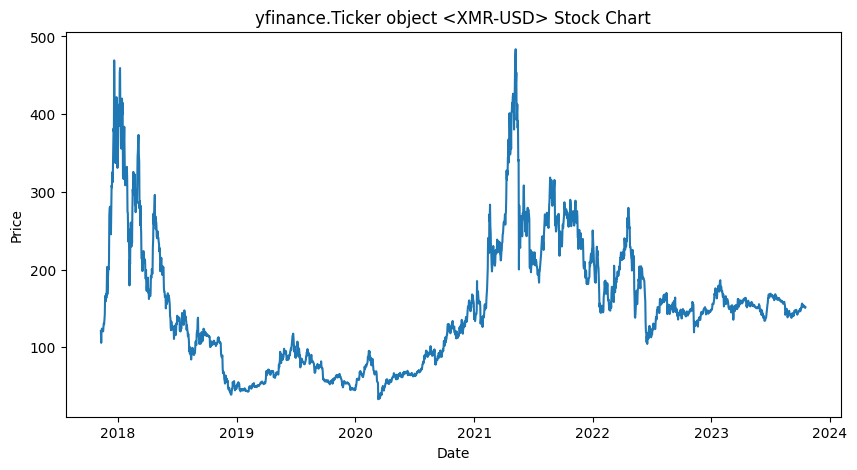

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df_xmr["Close"])
plt.title(f"{xmr} Stock Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [17]:
df_xmr

,Open,High,Low,Close,Adj Close,Volume,Close_difference
Date,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,-15.194000
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,14.029999
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,4.240005
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,-0.454002
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,-1.049004
...,...,...,...,...,...,...,...
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,-0.384171
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,0.095108
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,-2.021149


### candlestick


In [18]:
# ! pip install mplfinance

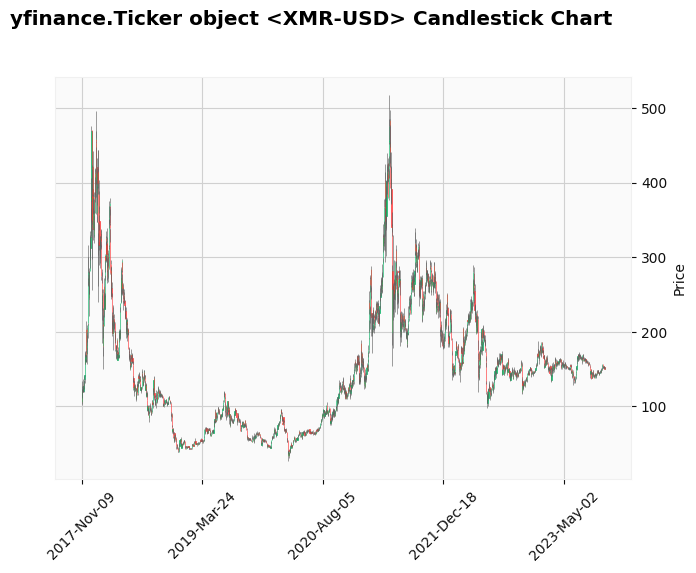

In [19]:
import mplfinance as mpf

mpf.plot(
    df_xmr.loc[:, :], type="candle", style="yahoo", title=f"{xmr} Candlestick Chart"
)

# Feature Engineering


### Check Missing Values


In [20]:
df_train_val.isna().sum()

Date        0
Close       0
Volume      0
Label       0
Variance    0
dtype: int64

### Outlier


##### drop ountliers, Z-Score method


In [21]:
def drop_outliers_zScore(data, threshold=3):
    z_scores = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()
    print((np.abs(z_scores) < threshold).all(axis=1).sum())
    filtered_data = data[(np.abs(z_scores) < threshold).all(axis=1)]
    return filtered_data

In [22]:
df_train_val_no_outliers_zScore = drop_outliers_zScore(df_train_val)
df_train_test_no_outliers_zScore = drop_outliers_zScore(df_train_test)
df_train_val_no_outliers_zScore

2095
2125


,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2124,2023-09-03,140.839981,49564266,1,2.094498
2125,2023-09-04,141.170868,63835398,0,2.993912
2126,2023-09-05,137.781372,54468002,1,3.625900
2127,2023-09-06,142.113235,67734044,1,5.009445


##### drop outliers with LocalOutlierFactor


In [23]:
from sklearn.neighbors import LocalOutlierFactor


def drop_outliers_LOF(df: pd.DataFrame):
    data = df.copy().drop("Date", axis=1)
    clf = LocalOutlierFactor(n_neighbors=10, contamination=0.03)  # 0.03, 0.05

    # Fit the data to the model
    y_pred = clf.fit_predict(data.copy().iloc[:, :-1])

    # Identify the outliers
    outliers = np.where(y_pred == -1)

    return df.drop(outliers[0])

In [24]:
# df_train_val.reset_index(drop=False)

In [25]:
df_train_val_no_outliers_lof = drop_outliers_LOF(df_train_val)
df_train_test_no_outliers_lof = drop_outliers_LOF(df_train_test)
df_train_val_no_outliers_lof

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2124,2023-09-03,140.839981,49564266,1,2.094498
2125,2023-09-04,141.170868,63835398,0,2.993912
2126,2023-09-05,137.781372,54468002,1,3.625900
2127,2023-09-06,142.113235,67734044,1,5.009445


##### choose one filtered dataframe


##### چون داده هامون سری زمانی هستن داده پرت پیدا کردن معنی نداره فکرکنم


### Split Data into Train and Validation


In [26]:
start_date_train = "2017-11-09"
end_date_train = "2023-06-07"

start_date_val = "2023-06-08"
end_date_val = "2023-09-07"

X_train, X_validation, y_train, y_validation = train_test_split_by_date(
    df_train_val,
    start_date_train,
    end_date_train,
    start_date_val,
    end_date_val,
    divide_X_y=True,
)

In [27]:
X_train.head()

,Date,Close,Volume,Variance
0,2017-11-09,120.779999,86864600,11.185997
1,2017-11-10,105.585999,84614000,19.907997
2,2017-11-11,119.615997,107708000,23.228004
3,2017-11-12,123.856003,144948000,23.057007
4,2017-11-13,123.402000,116200000,15.606003


In [28]:
X_validation.head()

,Date,Close,Volume,Variance
0,2023-06-08,142.660126,56664638,3.377151
1,2023-06-09,143.050003,52539231,2.429214
2,2023-06-10,137.812439,92419685,15.922714
3,2023-06-11,138.158829,39307804,3.207825
4,2023-06-12,140.197021,77701627,4.929169


In [29]:
X_train.describe()

,Date,Close,Volume,Variance
count,2037,2037.000000,2.037000e+03,2037.000000
mean,2020-08-23 00:00:00.000000256,149.895335,2.542309e+08,11.652186
min,2017-11-09 00:00:00,33.010323,1.016030e+07,0.610867
25%,2019-04-02 00:00:00,79.704430,6.595855e+07,3.583393
50%,2020-08-23 00:00:00,142.323288,1.066830e+08,7.223503
75%,2022-01-14 00:00:00,198.738998,1.967663e+08,13.692032
max,2023-06-07 00:00:00,483.583618,2.895912e+10,191.717880
std,NaN,83.999876,1.028817e+09,14.563935


### Plot Distributions


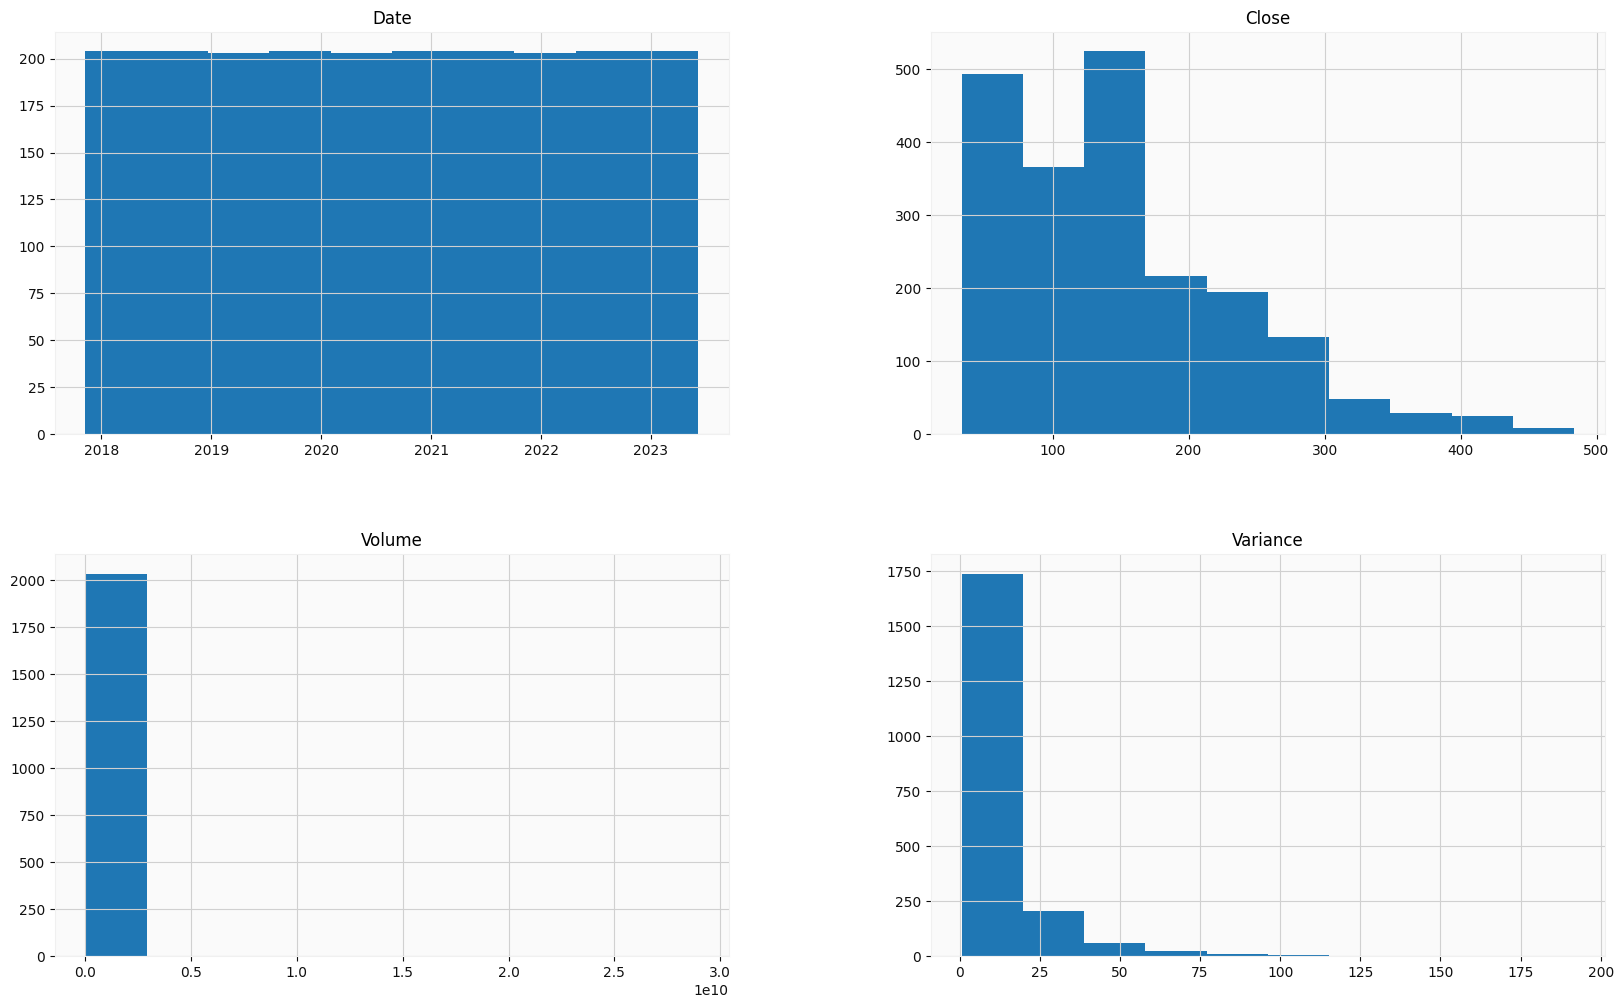

In [30]:
X_train.hist(figsize=[20, 12])
plt.show()

### Normalizing


##### method 1 : Standard Scaler


In [31]:
X_train_normalized_ss = X_train.copy()
X_validation_normalized_ss = X_validation.copy()

scaler_ss = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ss[cols] = scaler_ss.fit_transform(X_train_normalized_ss[cols])
X_validation_normalized_ss[cols] = scaler_ss.transform(X_validation_normalized_ss[cols])

In [32]:
X_train_normalized_ss.describe()

,Date,Close,Volume,Variance
count,2037,2037.000000,2037.000000,2.037000e+03
mean,2020-08-23 00:00:00.000000256,0.000000,0.000000,-2.790546e-17
min,2017-11-09 00:00:00,-1.391832,-0.237293,-7.583136e-01
25%,2019-04-02 00:00:00,-0.835812,-0.183044,-5.541616e-01
50%,2020-08-23 00:00:00,-0.090166,-0.143450,-3.041603e-01
75%,2022-01-14 00:00:00,0.581616,-0.055869,1.400959e-01
max,2023-06-07 00:00:00,3.973461,27.907736,1.236684e+01
std,NaN,1.000246,1.000246,1.000246e+00


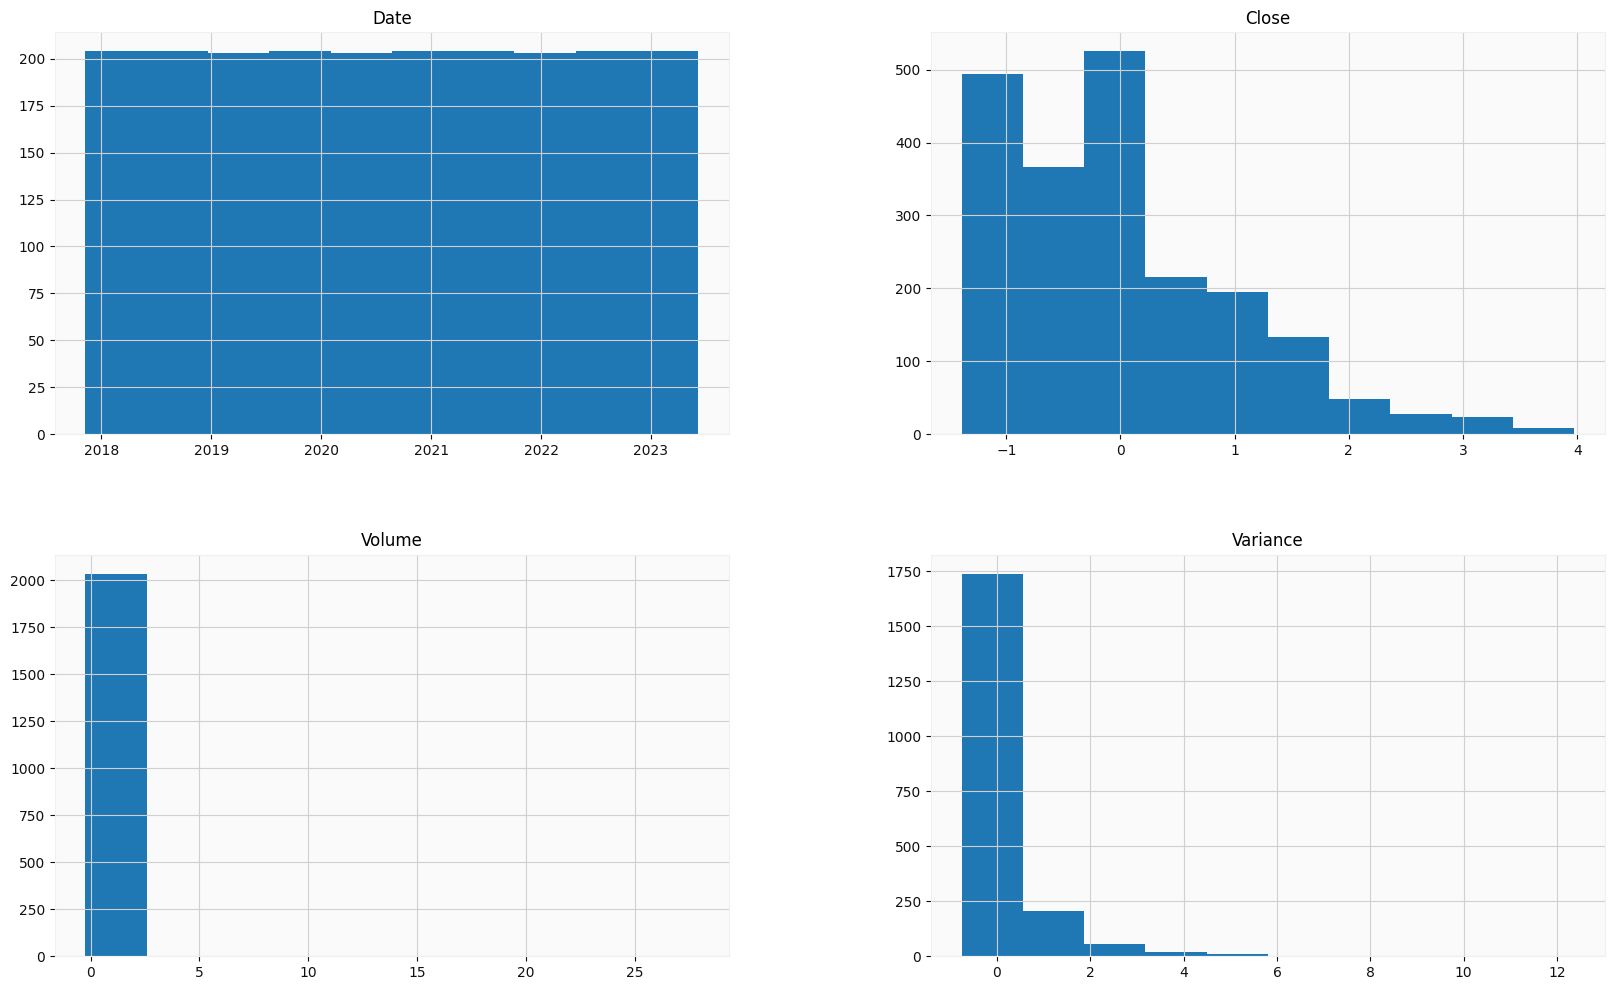

In [33]:
X_train_normalized_ss.hist(figsize=[20, 12])
plt.show()

##### method 2 : Power Transform


In [34]:
X_train_transformed = X_train.copy()
X_validation_transformed = X_validation.copy()

power_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

cols = X_train.drop(columns=["Date"]).columns

X_train_transformed[cols] = power_transformer.fit_transform(X_train_transformed[cols])
X_validation_transformed[cols] = power_transformer.transform(
    X_validation_transformed[cols]
)

In [35]:
X_train_transformed.describe()

,Date,Close,Volume,Variance
count,2037,2.037000e+03,2.037000e+03,2.037000e+03
mean,2020-08-23 00:00:00.000000256,-1.116218e-16,-1.088313e-14,3.069600e-16
min,2017-11-09 00:00:00,-2.211691e+00,-2.819797e+00,-2.491462e+00
25%,2019-04-02 00:00:00,-8.342388e-01,-5.256164e-01,-7.677758e-01
50%,2020-08-23 00:00:00,1.540727e-01,-3.308889e-02,2.600074e-02
75%,2022-01-14 00:00:00,7.534815e-01,5.444954e-01,7.129205e-01
max,2023-06-07 00:00:00,2.462102e+00,3.705187e+00,2.844513e+00
std,NaN,1.000246e+00,1.000246e+00,1.000246e+00


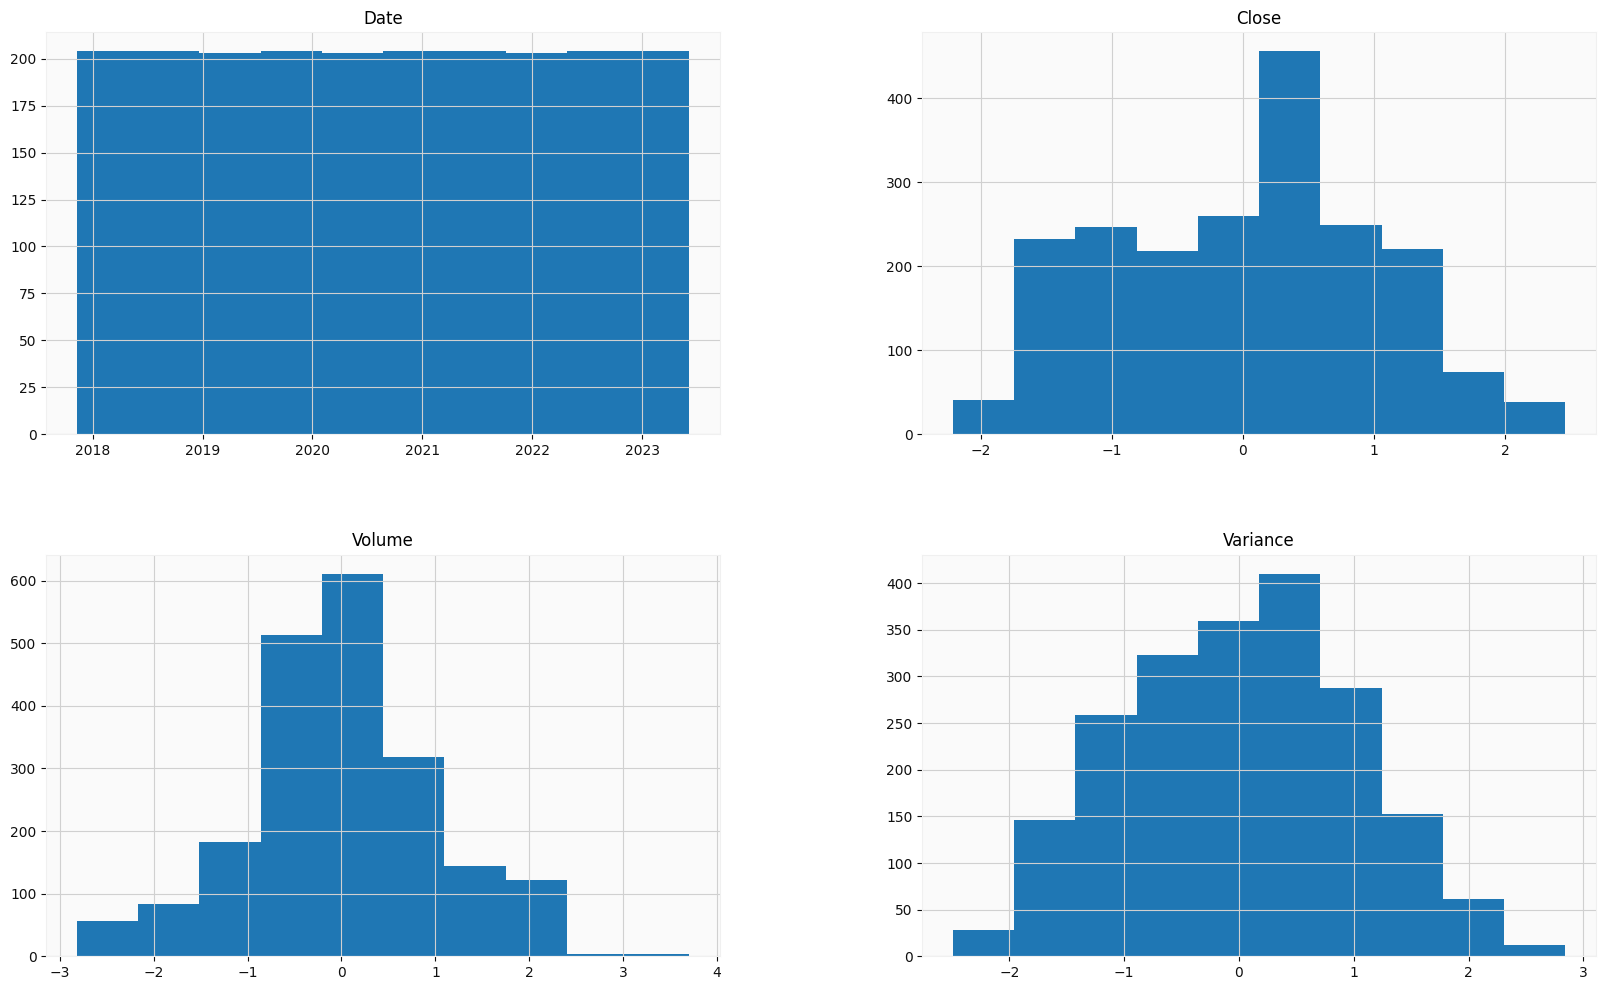

In [36]:
X_train_transformed.hist(figsize=[20, 12])
plt.show()

##### method 3 : Min Max Scaler


In [37]:
X_train_normalized_ms = X_train.copy()
X_validation_normalized_ms = X_validation.copy()

scaler_min_max = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ms[cols] = scaler_min_max.fit_transform(X_train_normalized_ms[cols])
X_validation_normalized_ms[cols] = scaler_min_max.transform(
    X_validation_normalized_ms[cols]
)

In [38]:
X_train_normalized_ms.describe()

,Date,Close,Volume,Variance
count,2037,2037.000000,2037.000000,2.037000e+03
mean,2020-08-23 00:00:00.000000256,0.000000,0.000000,-2.790546e-17
min,2017-11-09 00:00:00,-1.391832,-0.237293,-7.583136e-01
25%,2019-04-02 00:00:00,-0.835812,-0.183044,-5.541616e-01
50%,2020-08-23 00:00:00,-0.090166,-0.143450,-3.041603e-01
75%,2022-01-14 00:00:00,0.581616,-0.055869,1.400959e-01
max,2023-06-07 00:00:00,3.973461,27.907736,1.236684e+01
std,NaN,1.000246,1.000246,1.000246e+00


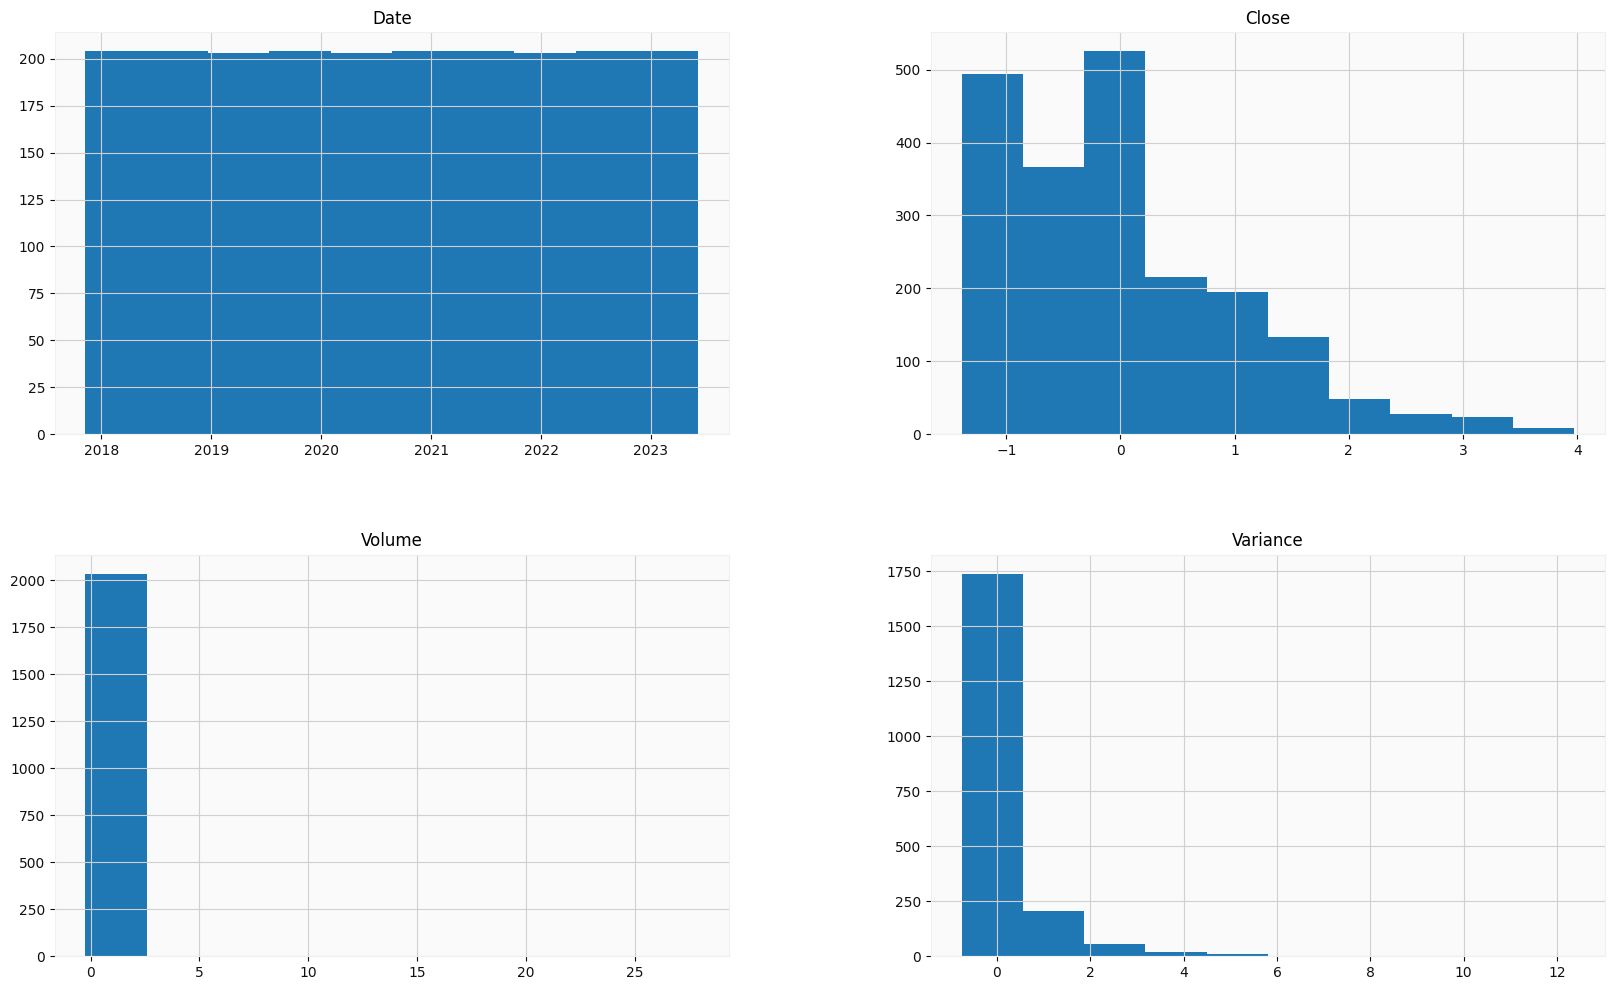

In [39]:
X_train_normalized_ms.hist(figsize=[20, 12])
plt.show()

In [40]:
df_train_val.corr()

,Date,Close,Volume,Label,Variance
Date,1.000000,0.163580,0.029405,0.040528,-0.133914
Close,0.163580,1.000000,0.049219,-0.015416,0.671699
Volume,0.029405,0.049219,1.000000,0.012916,0.083045
Label,0.040528,-0.015416,0.012916,1.000000,-0.008214
Variance,-0.133914,0.671699,0.083045,-0.008214,1.000000


# Train


### Create Functions


##### Normalization Function


In [41]:
def normalization(X_train, X_test, method):
    X_train_normalized = X_train.copy()
    X_test_normalized = X_test.copy()

    if method == "StandardScaler":
        ss = StandardScaler()
        X_train_normalized[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ss.transform(X_test[X_test.columns])

    if method == "MinMaxScaler":
        ms = MinMaxScaler()
        X_train_normalized[X_train.columns] = ms.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ms.transform(X_test[X_test.columns])

    if method == "PowerTransformer":
        pt = PowerTransformer()
        X_train_normalized[X_train.columns] = pt.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = pt.transform(X_test[X_test.columns])

    return X_train_normalized, X_test_normalized

##### Evaluation Function


In [42]:
def evaluation(y_true, y_pred, df_evaluation, df_confusion, model_name):
    # Evaluate
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    new_record_evaluation = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score,
        "MSE": mse,
    }

    df_evaluation.loc[model_name] = new_record_evaluation

    # Confusion matrix

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # tp = np.sum((y_true == 1) & (y_pred == 1))
    # tn = np.sum((y_true == 0) & (y_pred == 0))
    # fp = np.sum((y_true == 0) & (y_pred == 1))
    # fn = np.sum((y_true == 1) & (y_pred == 0))

    new_record_confusion = {
        "tp": confusion[1, 1],
        "tn": confusion[0, 0],
        "fp": confusion[0, 1],
        "fn": confusion[1, 0],
    }

    df_confusion.loc[model_name] = new_record_confusion

    print(confusion)
    print(new_record_evaluation)

    return df_evaluation, df_confusion

##### Model Function


In [43]:
def model_predict(
    df_train_val,
    model,
    test_item,
    normalize=False,
    start_date_train="2017-11-09",
    start_date_val="2023-08-08",
    end_date_val="2023-09-07",
):
    from datetime import date, timedelta

    test_item_date = test_item.Date.date()

    end_date_train = (test_item_date - timedelta(days=1)).strftime("%Y-%m-%d")

    X_train, y_train = train_test_split_by_date(
        df_train_val,
        start_date_train,
        end_date_train,
        start_date_val,
        end_date_val,
        divide_X_y=True,
        test=False,
    )

    X_train = X_train.drop("Date", axis=1)
    X_test = (test_item[1:].to_frame().T).astype(float)

    # Normalized
    # if normalize:
    X_train, X_test = normalization(X_train, X_test, method="PowerTransformer")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    return y_pred

### Define Evaluation Matrixes


In [44]:
df_confusion_val = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_val = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

### Try models


##### Logistic Regression


In [45]:
def logestic_regression(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.linear_model import LogisticRegression

    model_lr = LogisticRegression(C=1, penalty="l2")
    model_name = "Logistic Regression"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_lr
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [46]:
logestic_regression(
    df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


In [108]:
logestic_regression(
    df_train_val_no_outliers_zScore,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


In [109]:
logestic_regression(
    df_train_val_no_outliers_lof,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


##### Decision Tree


In [47]:
def decision_tree_classifier(
    df, X_test, y_test, df_evaluation, df_confusion, max_depth
):
    from sklearn.tree import DecisionTreeClassifier

    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_name = "Decision Tree"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_dt
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [117]:
max_depth = 20
decision_tree_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
)

[[11 28]
 [25 28]]
{'Accuracy': 0.42391304347826086, 'Precision': 0.5, 'Recall': 0.5283018867924528, 'F1 Score': 0.5137614678899083, 'AUC': 0.40517658442186744, 'MSE': 0.5760869565217391}


In [118]:
max_depth = 20
decision_tree_classifier(
    df_train_val_no_outliers_zScore,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
)

[[13 26]
 [24 29]]
{'Accuracy': 0.45652173913043476, 'Precision': 0.5272727272727272, 'Recall': 0.5471698113207547, 'F1 Score': 0.537037037037037, 'AUC': 0.44025157232704404, 'MSE': 0.5434782608695652}


In [119]:
max_depth = 20
decision_tree_classifier(
    df_train_val_no_outliers_lof,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
)

[[16 23]
 [30 23]]
{'Accuracy': 0.42391304347826086, 'Precision': 0.5, 'Recall': 0.4339622641509434, 'F1 Score': 0.46464646464646464, 'AUC': 0.4221093372036768, 'MSE': 0.5760869565217391}


##### SVM


In [51]:
def svm(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.svm import SVC

    model_svm = SVC()
    model_name = "SVM"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    # change Label 0 to -1
    # df["Label"] = df["Label"].replace({0: -1})
    # y_test = y_test.replace({0: -1})

    model_new = model_svm
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    # print(y_pred_list)
    # print(y_test.tolist())

In [52]:
svm(
    df_train_val.copy(), X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


In [110]:
svm(
    df_train_val_no_outliers_zScore.copy(),
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


In [111]:
svm(
    df_train_val_no_outliers_lof.copy(),
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


##### AdaBoost


In [214]:
def ada_boost(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.ensemble import AdaBoostClassifier

    model_ada = AdaBoostClassifier(learning_rate=2.5, random_state=42)
    model_name = "Ada Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_ada
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [215]:
ada_boost(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


In [216]:
ada_boost(
    df_train_val_no_outliers_zScore,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


In [146]:
ada_boost(
    df_train_val_no_outliers_lof,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[11 28]
 [ 9 44]]
{'Accuracy': 0.5978260869565217, 'Precision': 0.6111111111111112, 'Recall': 0.8301886792452831, 'F1 Score': 0.7040000000000001, 'AUC': 0.5561199806482826, 'MSE': 0.40217391304347827}


##### KNN


In [57]:
def knn(
    df, X_test, y_test, df_evaluation, df_confusion, n_neighbors, metric="manhattan"
):
    from sklearn.neighbors import KNeighborsClassifier

    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    model_name = "KNN"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_knn
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [228]:
n_neighbors = 15
metric = "euclidean"
knn(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    n_neighbors,
    metric,
)

[[11 28]
 [19 34]]
{'Accuracy': 0.4891304347826087, 'Precision': 0.5483870967741935, 'Recall': 0.6415094339622641, 'F1 Score': 0.591304347826087, 'AUC': 0.4617803580067731, 'MSE': 0.5108695652173914}


In [221]:
n_neighbors = 15
metric = "manhattan"
knn(
    df_train_val_no_outliers_zScore,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    n_neighbors,
    metric,
)

[[ 9 30]
 [14 39]]
{'Accuracy': 0.5217391304347826, 'Precision': 0.5652173913043478, 'Recall': 0.7358490566037735, 'F1 Score': 0.6393442622950819, 'AUC': 0.48330914368650213, 'MSE': 0.4782608695652174}


In [224]:
n_neighbors = 15
metric = "manhattan"
knn(
    df_train_val_no_outliers_lof,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    n_neighbors,
    metric,
)

[[12 27]
 [18 35]]
{'Accuracy': 0.5108695652173914, 'Precision': 0.5645161290322581, 'Recall': 0.660377358490566, 'F1 Score': 0.6086956521739131, 'AUC': 0.4840348330914369, 'MSE': 0.4891304347826087}


##### Random Forest


In [61]:
def random_forest_classifier(
    df, X_test, y_test, df_evaluation, df_confusion, max_depth, n_estimators
):
    from sklearn.ensemble import RandomForestClassifier

    model_rf = RandomForestClassifier(
        max_depth=max_depth,
        random_state=42,
        n_estimators=n_estimators,
    )
    model_name = "Random Forest"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_rf
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [183]:
max_depth = 15
n_estimators = 100
random_forest_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
    n_estimators,
)

[[12 27]
 [14 39]]
{'Accuracy': 0.5543478260869565, 'Precision': 0.5909090909090909, 'Recall': 0.7358490566037735, 'F1 Score': 0.6554621848739496, 'AUC': 0.5217706821480407, 'MSE': 0.44565217391304346}


In [184]:
max_depth = 15
n_estimators = 100
random_forest_classifier(
    df_train_val_no_outliers_zScore,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
    n_estimators,
)

[[13 26]
 [16 37]]
{'Accuracy': 0.5434782608695652, 'Precision': 0.5873015873015873, 'Recall': 0.6981132075471698, 'F1 Score': 0.6379310344827586, 'AUC': 0.5157232704402516, 'MSE': 0.45652173913043476}


In [185]:
max_depth = 15
n_estimators = 100
random_forest_classifier(
    df_train_val_no_outliers_lof,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
    n_estimators,
)

[[10 29]
 [19 34]]
{'Accuracy': 0.4782608695652174, 'Precision': 0.5396825396825397, 'Recall': 0.6415094339622641, 'F1 Score': 0.5862068965517241, 'AUC': 0.44895984518626025, 'MSE': 0.5217391304347826}


##### Gausian


In [65]:
def gaussian_nb(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.naive_bayes import GaussianNB

    model_gnb = GaussianNB()
    model_name = "Gaussian NB"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_gnb
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [66]:
gaussian_nb(
    df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


In [112]:
gaussian_nb(
    df_train_val_no_outliers_zScore,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


In [113]:
gaussian_nb(
    df_train_val_no_outliers_lof,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[ 0 39]
 [ 0 53]]
{'Accuracy': 0.5760869565217391, 'Precision': 0.5760869565217391, 'Recall': 1.0, 'F1 Score': 0.7310344827586206, 'AUC': 0.5, 'MSE': 0.42391304347826086}


##### XGboost


In [67]:
# ! pip install xgboost

In [68]:
def xg_boost(df, X_test, y_test, df_evaluation, df_confusion):
    from xgboost import XGBClassifier

    model_xgb = XGBClassifier(random_state=42)
    model_name = "Xg Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_xgb
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [69]:
xg_boost(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[14 25]
 [24 29]]
{'Accuracy': 0.4673913043478261, 'Precision': 0.5370370370370371, 'Recall': 0.5471698113207547, 'F1 Score': 0.5420560747663552, 'AUC': 0.4530720851475568, 'MSE': 0.532608695652174}


In [70]:
xg_boost(
    df_train_val_no_outliers_zScore,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[14 25]
 [20 33]]
{'Accuracy': 0.5108695652173914, 'Precision': 0.5689655172413793, 'Recall': 0.6226415094339622, 'F1 Score': 0.5945945945945946, 'AUC': 0.4908079342041606, 'MSE': 0.4891304347826087}


In [71]:
xg_boost(
    df_train_val_no_outliers_lof,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[ 9 30]
 [18 35]]
{'Accuracy': 0.4782608695652174, 'Precision': 0.5384615384615384, 'Recall': 0.660377358490566, 'F1 Score': 0.5932203389830508, 'AUC': 0.44557329462989836, 'MSE': 0.5217391304347826}


##### Staking Models


In [72]:
# ! pip install mlxtend

In [244]:
def stacking(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from xgboost import XGBClassifier
    from mlxtend.classifier import StackingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC

    model_svm = SVC(probability=True)
    model_lr = LogisticRegression(C=1, penalty="l2")
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
    model_xgb = XGBClassifier(objective="binary:logistic", random_state=42)
    model_knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski")
    model_adaboost = AdaBoostClassifier(learning_rate=0.9, random_state=42)

    stacking_model = StackingClassifier(
        classifiers=[model_knn, model_rf],
        use_probas=True,
        meta_classifier=RandomForestClassifier(n_estimators=100, random_state=42),
    )

    model_name = "Stacking ()"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = stacking_model
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [245]:
stacking(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[15 24]
 [19 34]]
{'Accuracy': 0.532608695652174, 'Precision': 0.5862068965517241, 'Recall': 0.6415094339622641, 'F1 Score': 0.6126126126126126, 'AUC': 0.5130624092888243, 'MSE': 0.4673913043478261}


In [75]:
stacking(
    df_train_val_no_outliers_zScore,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[10 29]
 [17 36]]
{'Accuracy': 0.5, 'Precision': 0.5538461538461539, 'Recall': 0.6792452830188679, 'F1 Score': 0.6101694915254237, 'AUC': 0.46782776971456214, 'MSE': 0.5}


In [76]:
stacking(
    df_train_val_no_outliers_lof,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
)

[[17 22]
 [23 30]]
{'Accuracy': 0.5108695652173914, 'Precision': 0.5769230769230769, 'Recall': 0.5660377358490566, 'F1 Score': 0.5714285714285713, 'AUC': 0.5009675858732462, 'MSE': 0.4891304347826087}


### Evaluation


In [77]:
f1_score(y_validation, y_validation.shift(1).fillna(0))

0.5333333333333333

In [78]:
f1_score(y_validation, y_validation.shift(1).fillna(1))

0.5471698113207547

In [79]:
df_evaluation_val

,Accuracy,Precision,Recall,F1 Score,AUC,MSE
Logistic Regression,0.576087,0.576087,1.000000,0.731034,0.500000,0.423913
Decision Tree,0.445652,0.519231,0.509434,0.514286,0.434204,0.554348
SVM,0.576087,0.576087,1.000000,0.731034,0.500000,0.423913
Ada Boost,0.586957,0.605634,0.811321,0.693548,0.546686,0.413043
KNN,0.510870,0.566667,0.641509,0.601770,0.487421,0.489130
Random Forest,0.543478,0.582090,0.735849,0.650000,0.508950,0.456522
Gaussian NB,0.576087,0.576087,1.000000,0.731034,0.500000,0.423913
Xg Boost,0.478261,0.538462,0.660377,0.593220,0.445573,0.521739
Stacking (),0.510870,0.576923,0.566038,0.571429,0.500968,0.489130


In [80]:
df_confusion_val

,tn,fp,fn,tp
Logistic Regression,0,39,0,53
Decision Tree,14,25,26,27
SVM,0,39,0,53
Ada Boost,11,28,10,43
KNN,13,26,19,34
Random Forest,11,28,14,39
Gaussian NB,0,39,0,53
Xg Boost,9,30,18,35
Stacking (),17,22,23,30


# Test


### Devide X, y


In [81]:
X_test = df_test.drop(columns=["Label"])
y_test = df_test["Label"]

### Define Ealuation Dataframes


In [82]:
df_confusion_test = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_test = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

### Try Models


In [83]:
logestic_regression(
    df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test
)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [194]:
max_depth = 20
decision_tree_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
)

[[ 7  5]
 [ 8 10]]
{'Accuracy': 0.5666666666666667, 'Precision': 0.6666666666666666, 'Recall': 0.5555555555555556, 'F1 Score': 0.606060606060606, 'AUC': 0.5694444444444444, 'MSE': 0.43333333333333335}


In [195]:
max_depth = 20
decision_tree_classifier(
    df_train_test_no_outliers_zScore,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
)

[[6 6]
 [9 9]]
{'Accuracy': 0.5, 'Precision': 0.6, 'Recall': 0.5, 'F1 Score': 0.5454545454545454, 'AUC': 0.5, 'MSE': 0.5}


In [196]:
max_depth = 20
decision_tree_classifier(
    df_train_test_no_outliers_lof,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
)

[[ 7  5]
 [ 8 10]]
{'Accuracy': 0.5666666666666667, 'Precision': 0.6666666666666666, 'Recall': 0.5555555555555556, 'F1 Score': 0.606060606060606, 'AUC': 0.5694444444444444, 'MSE': 0.43333333333333335}


In [87]:
svm(df_train_test.copy(), X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [217]:
ada_boost(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [218]:
ada_boost(
    df_train_test_no_outliers_zScore,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [219]:
ada_boost(
    df_train_test_no_outliers_lof, X_test, y_test, df_evaluation_test, df_confusion_test
)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [243]:
n_neighbors = 5


metric = "minkowski"
knn(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    n_neighbors,
    metric,
)

[[ 6  6]
 [ 5 13]]
{'Accuracy': 0.6333333333333333, 'Precision': 0.6842105263157895, 'Recall': 0.7222222222222222, 'F1 Score': 0.7027027027027027, 'AUC': 0.6111111111111112, 'MSE': 0.36666666666666664}


In [92]:
n_neighbors = 5


metric = "minkowski"
knn(
    df_train_test_no_outliers_zScore,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    n_neighbors,
    metric,
)

[[ 5  7]
 [ 5 13]]
{'Accuracy': 0.6, 'Precision': 0.65, 'Recall': 0.7222222222222222, 'F1 Score': 0.6842105263157895, 'AUC': 0.5694444444444444, 'MSE': 0.4}


In [93]:
n_neighbors = 5


metric = "minkowski"
knn(
    df_train_test_no_outliers_lof,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    n_neighbors,
    metric,
)

[[ 5  7]
 [ 5 13]]
{'Accuracy': 0.6, 'Precision': 0.65, 'Recall': 0.7222222222222222, 'F1 Score': 0.6842105263157895, 'AUC': 0.5694444444444444, 'MSE': 0.4}


In [242]:
max_depth = 15
n_estimators = 100
random_forest_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    n_estimators,
)

[[ 6  6]
 [ 5 13]]
{'Accuracy': 0.6333333333333333, 'Precision': 0.6842105263157895, 'Recall': 0.7222222222222222, 'F1 Score': 0.7027027027027027, 'AUC': 0.6111111111111112, 'MSE': 0.36666666666666664}


In [95]:
max_depth = 13
n_estimators = 100
random_forest_classifier(
    df_train_test_no_outliers_zScore,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    n_estimators,
)

[[ 4  8]
 [ 5 13]]
{'Accuracy': 0.5666666666666667, 'Precision': 0.6190476190476191, 'Recall': 0.7222222222222222, 'F1 Score': 0.6666666666666666, 'AUC': 0.5277777777777778, 'MSE': 0.43333333333333335}


In [96]:
max_depth = 13
n_estimators = 100
random_forest_classifier(
    df_train_test_no_outliers_lof,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    n_estimators,
)

[[ 4  8]
 [ 8 10]]
{'Accuracy': 0.4666666666666667, 'Precision': 0.5555555555555556, 'Recall': 0.5555555555555556, 'F1 Score': 0.5555555555555556, 'AUC': 0.4444444444444445, 'MSE': 0.5333333333333333}


In [97]:
gaussian_nb(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 0 12]
 [ 0 18]]
{'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1 Score': 0.7499999999999999, 'AUC': 0.5, 'MSE': 0.4}


In [98]:
xg_boost(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 5  7]
 [ 8 10]]
{'Accuracy': 0.5, 'Precision': 0.5882352941176471, 'Recall': 0.5555555555555556, 'F1 Score': 0.5714285714285715, 'AUC': 0.48611111111111116, 'MSE': 0.5}


In [99]:
xg_boost(
    df_train_test_no_outliers_zScore,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
)

[[6 6]
 [9 9]]
{'Accuracy': 0.5, 'Precision': 0.6, 'Recall': 0.5, 'F1 Score': 0.5454545454545454, 'AUC': 0.5, 'MSE': 0.5}


In [100]:
xg_boost(
    df_train_test_no_outliers_lof, X_test, y_test, df_evaluation_test, df_confusion_test
)

[[ 6  6]
 [10  8]]
{'Accuracy': 0.4666666666666667, 'Precision': 0.5714285714285714, 'Recall': 0.4444444444444444, 'F1 Score': 0.5, 'AUC': 0.4722222222222222, 'MSE': 0.5333333333333333}


In [246]:
stacking(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 7  5]
 [10  8]]
{'Accuracy': 0.5, 'Precision': 0.6153846153846154, 'Recall': 0.4444444444444444, 'F1 Score': 0.5161290322580646, 'AUC': 0.5138888888888888, 'MSE': 0.5}


In [102]:
stacking(
    df_train_test_no_outliers_zScore,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
)

[[ 7  5]
 [ 6 12]]
{'Accuracy': 0.6333333333333333, 'Precision': 0.7058823529411765, 'Recall': 0.6666666666666666, 'F1 Score': 0.6857142857142857, 'AUC': 0.6249999999999999, 'MSE': 0.36666666666666664}


In [103]:
stacking(
    df_train_test_no_outliers_lof, X_test, y_test, df_evaluation_test, df_confusion_test
)

[[ 7  5]
 [12  6]]
{'Accuracy': 0.43333333333333335, 'Precision': 0.5454545454545454, 'Recall': 0.3333333333333333, 'F1 Score': 0.41379310344827586, 'AUC': 0.45833333333333326, 'MSE': 0.5666666666666667}


### Evaluation


In [104]:
df_evaluation_test

,Accuracy,Precision,Recall,F1 Score,AUC,MSE
Logistic Regression,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
Decision Tree,0.466667,0.555556,0.555556,0.555556,0.444444,0.533333
SVM,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
Ada Boost,0.666667,0.642857,1.000000,0.782609,0.583333,0.333333
KNN,0.600000,0.650000,0.722222,0.684211,0.569444,0.400000
Random Forest,0.466667,0.555556,0.555556,0.555556,0.444444,0.533333
Gaussian NB,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
Xg Boost,0.466667,0.571429,0.444444,0.500000,0.472222,0.533333
Stacking (),0.433333,0.545455,0.333333,0.413793,0.458333,0.566667


In [105]:
df_confusion_test

,tn,fp,fn,tp
Logistic Regression,0,12,0,18
Decision Tree,4,8,8,10
SVM,0,12,0,18
Ada Boost,2,10,0,18
KNN,5,7,5,13
Random Forest,4,8,8,10
Gaussian NB,0,12,0,18
Xg Boost,6,6,10,8
Stacking (),7,5,12,6


In [106]:
f1_score(y_test, y_test.shift(1).fillna(0))

0.5714285714285715

In [107]:
y_test.value_counts()

Label
1    18
0    12
Name: count, dtype: int64